In [3]:
!pip install -Uqq fastbook --upgrade
import fastbook
fastbook.setup_book()
fastbook.__version__

C:\Users\Henry\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


'0.0.18'

In [4]:
# https://forums.fast.ai/t/import-fastbook-gives-an-error-in-all-the-colab-notebooks/82745/10
!pip show fastbook

Name: fastbook
Version: 0.0.18
Summary: Deep Learning for Coders, 2020
Home-page: https://github.com/fastai/fastbook
Author: Jeremy Howard and Sylvain Gugger
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: c:\users\henry\anaconda3\lib\site-packages
Requires: requests, packaging, pandas, ipywidgets, nbdev, sentencepiece, pip, fastai
Required-by: 


In [5]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [6]:
import PIL
from PIL import Image

## Clean

In [7]:
key = os.environ.get('AZURE_SEARCH_KEY', '46e49b1a27d04aad9cc9f4b43f68edf6')
term = " "
term = "ant.jpg, -ants"

In [8]:
results = search_images_bing(key, term)
ims = results.attrgot('contentUrl')
ims

(#150) ['https://upload.wikimedia.org/wikipedia/commons/8/83/Flickr_-_ggallice_-_Conga_ant.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Bee_%26_Ant.jpg/800px-Bee_%26_Ant.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Sydney_flying_ant.jpg/1200px-Sydney_flying_ant.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Black-headed_Strobe_Ant.jpg/727px-Black-headed_Strobe_Ant.jpg','https://upload.wikimedia.org/wikipedia/commons/3/3e/Focus_on_ant.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Ant.jpg/800px-Ant.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Black_ant.JPG/800px-Black_ant.JPG','https://live.staticflickr.com/3191/2929989000_b0bbf68a0e.jpg','https://upload.wikimedia.org/wikipedia/commons/1/19/Red_Velvet_Ant.JPG','http://www.cosmicadventure.com/g3/var/resizes/Peru-Panama/Amazon/Leaf%20Cutter%20ant.jpg?m=1324605531'...]

In [9]:
print(type(ims)) #guess it is a list

<class 'fastcore.foundation.L'>


In [10]:
ims[8]

'https://upload.wikimedia.org/wikipedia/commons/1/19/Red_Velvet_Ant.JPG'

In [11]:
dest = 'images/ant.jpg'

In [12]:
download_url(ims[8], dest)

Path('images/ant.jpg')

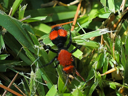

In [13]:
im = Image.open(dest)
im.to_thumb(128,128)

In [39]:
import os
import shutil

# mydir= input("Enter directory name: ")
mydir = 'pests'

try:
    shutil.rmtree(mydir)
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))
    path.mkdir()

In [40]:
#pest_types =  'ants -anteater', 'roaches +cockroaches', 'bedbugs', 'spiders', 'fly +flies'
pests_types = []
pests_types = 'roach', 'bedbug', 'spider', 'fly','ants'
path = Path('pests')
path

Path('pests')

In [41]:
if not path.exists():
    path.mkdir()
    for o in pest_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, o)
        download_images(dest, urls=results.attrgot('contentUrl'), n_workers=0)
        print(path.ls())
        print(o)    
    

[Path('pests/roach')]
roach
[Path('pests/bedbug'), Path('pests/roach')]
bedbug
[Path('pests/bedbug'), Path('pests/roach'), Path('pests/spider')]
spider
[Path('pests/bedbug'), Path('pests/fly'), Path('pests/roach'), Path('pests/spider')]
fly
[Path('pests/ants'), Path('pests/bedbug'), Path('pests/fly'), Path('pests/roach'), Path('pests/spider')]
ants


In [42]:
path.ls()

(#5) [Path('pests/ants'),Path('pests/bedbug'),Path('pests/fly'),Path('pests/roach'),Path('pests/spider')]

In [43]:
fns = get_image_files(path)
fns

(#688) [Path('pests/ants/00000000.jpg'),Path('pests/ants/00000001.jpg'),Path('pests/ants/00000003.jpg'),Path('pests/ants/00000004.jpg'),Path('pests/ants/00000005.jpg'),Path('pests/ants/00000006.jpg'),Path('pests/ants/00000007.jpg'),Path('pests/ants/00000008.jpg'),Path('pests/ants/00000009.jpg'),Path('pests/ants/00000010.jpg')...]

In [44]:
failed = verify_images(fns)
failed

(#11) [Path('pests/ants/00000068.jpg'),Path('pests/ants/00000148.jpg'),Path('pests/bedbug/00000015.jpg'),Path('pests/bedbug/00000026.png'),Path('pests/bedbug/00000060.jpg'),Path('pests/bedbug/00000112.JPG'),Path('pests/bedbug/00000135.jpg'),Path('pests/fly/00000058.jpg'),Path('pests/roach/00000069.jpg'),Path('pests/roach/00000126.jpg')...]

In [45]:
failed.map(Path.unlink);

## From Data to DataLoaders

In [73]:
pests_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [74]:
dls = pests_db.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


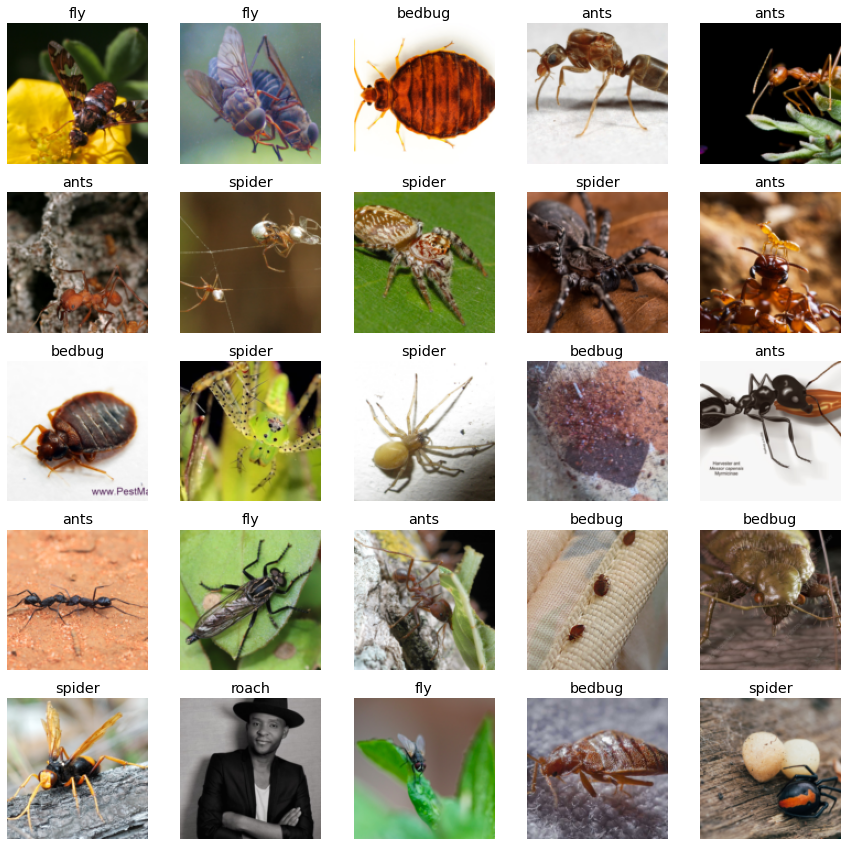

In [75]:
dls.valid.show_batch(max_n=25, nrows=5)

## DataLoaders

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


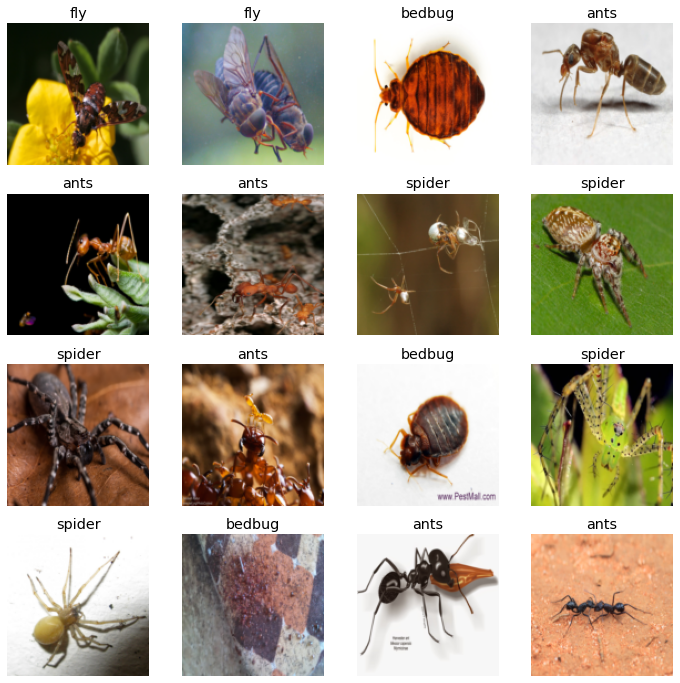

In [76]:
pests_db = pests_db.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = pests_db.dataloaders(path)
dls.valid.show_batch(max_n=16, nrows=4)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


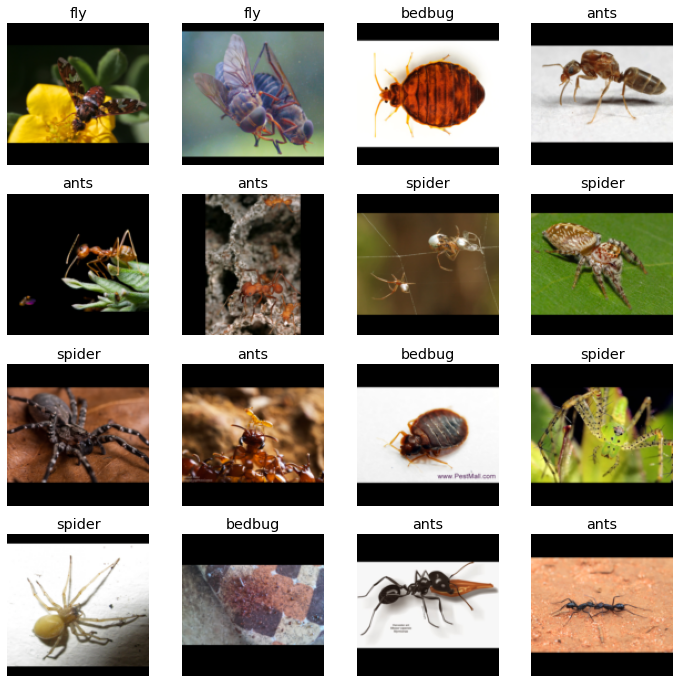

In [77]:
pests_db = pests_db.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = pests_db.dataloaders(path)
dls.valid.show_batch(max_n=16, nrows=4)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


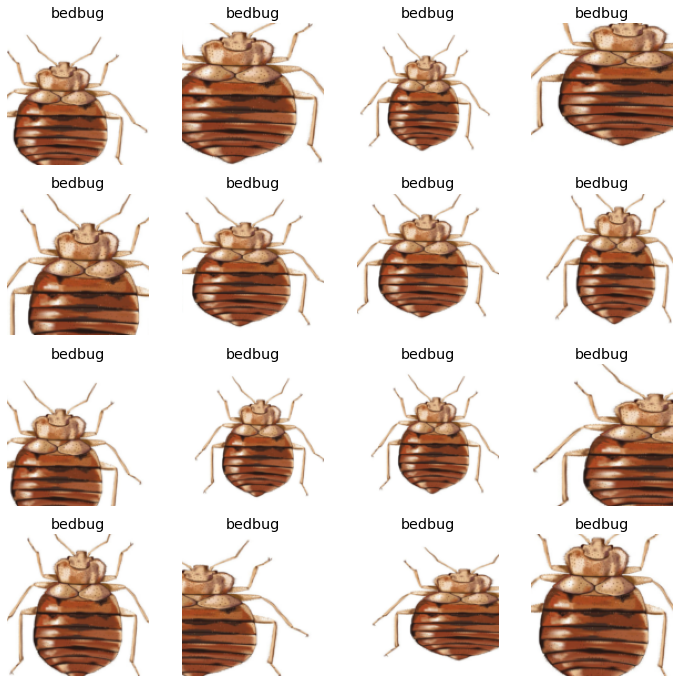

In [78]:
pests_db = pests_db.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = pests_db.dataloaders(path)
dls.train.show_batch(max_n=16, nrows=4, unique=True)

### Data Augmentation

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


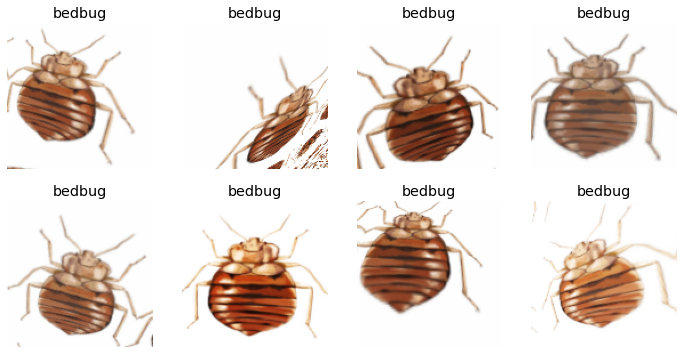

In [79]:
pests_db = pests_db.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = pests_db.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [80]:
pests_db = pests_db.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = pests_db.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


We can now create our Learner and fine-tune it in the usual way:

In [81]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.274082,0.818802,0.283465,01:33


epoch,train_loss,valid_loss,error_rate,time
0,0.938792,0.569656,0.173228,01:53
1,0.746525,0.495978,0.125984,01:56
2,0.603912,0.490554,0.110236,01:54
3,0.501460,0.503040,0.118110,01:53


In [ ]:
# Skip unless you wish to change something like fine_tune to say 10 on a high speed machine

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

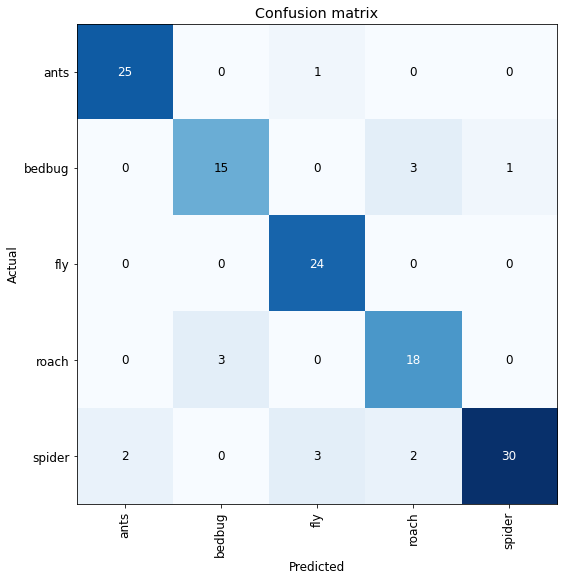

In [82]:
from sklearn.metrics import plot_confusion_matrix
#fig, ax = plt.subplots(figsize=(15, 15))

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8))


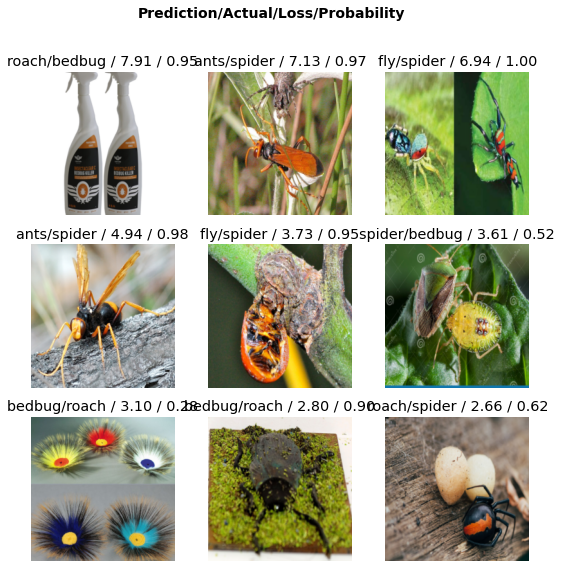

In [83]:
interp.plot_top_losses(9, nrows=3)

In [84]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [94]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
# to move to a different category which we did not do
 #for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [95]:
dls = pests_db.dataloaders(path)
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\Henry/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.219702,1.048970,0.361111,02:55


epoch,train_loss,valid_loss,error_rate,time
0,0.930183,0.557540,0.203704,02:35
1,0.685284,0.355358,0.120370,02:30
2,0.500894,0.362227,0.092593,02:30
3,0.399038,0.355249,0.101852,02:31
4,0.330404,0.347349,0.101852,02:31
5,0.279454,0.343104,0.101852,02:30


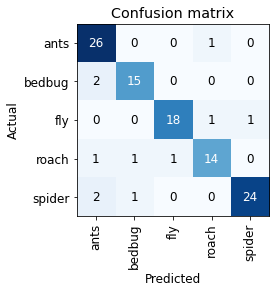

In [96]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

In [97]:
learn.export()

In [98]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

## using image classifier for inference

In [101]:
learn_inf = load_learner(path/'pests_export.pkl')

In [120]:
ims = ['https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/08/26/10/09/ds00663_im00966_ans7_bedbugthu_jpg.jpg']
dest = 'images/test_pests1.jpg'

download_url(ims[0], dest)

Path('images/test_pests1.jpg')

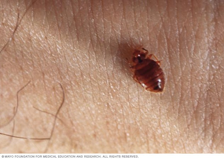

In [121]:
import os

from PIL import Image

im = Image.open(dest)
im.to_thumb(224,224)

In [122]:
learn_inf.predict('images/test_pests1.jpg')

('bedbug',
 tensor(1),
 tensor([7.6532e-05, 9.9943e-01, 1.0211e-05, 4.6547e-04, 2.1914e-05]))

In [123]:
learn_inf.dls.vocab

['ants', 'bedbug', 'fly', 'roach', 'spider']